In [20]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils.constant import ATTRIBUTES
import pandas as pd

In [21]:
font_size = 26
sns.set_style("white")
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams["legend.loc"] = 'best'
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': font_size})

In [53]:
def plot_score_per_attr(scores_file, model_name, display_df = False):
    with open(scores_file) as json_data:
        attributes_dict = json.load(json_data)
    array_preds = np.array([np.round(np.array(l)) for l in attributes_dict['logits']])
    total_preds = np.sum(array_preds, axis=0).astype(int)
    df = pd.DataFrame(columns=['count','attributes'])

    df['count'] = total_preds/array_preds.shape[0]
    df['attributes'] = ATTRIBUTES.values()
    df['attributes_id'] = [i for i in range(40)]
    
    if display_df: print(df)
    ax = plt.axes()
    sns.barplot(data=df, x='attributes_id', y='count', orient='v', ax=ax, palette='muted')

    ax.set_xlabel("Classes")
    ax.set_ylabel("Pourcentages")
    ax.title.set_text(f"Pourcentage de predictions par classe pour {model_name}")
    plt.show()

In [30]:
print(ATTRIBUTES)

{0: '5_o_Clock_Shadow', 1: 'Arched_Eyebrows', 2: 'Attractive', 3: 'Bags_Under_Eyes', 4: 'Bald', 5: 'Bangs', 6: 'Big_Lips', 7: 'Big_Nose', 8: 'Black_Hair', 9: 'Blond_Hair', 10: 'Blurry', 11: 'Brown_Hair', 12: 'Bushy_Eyebrows', 13: 'Chubby', 14: 'Double_Chin', 15: 'Eyeglasses', 16: 'Goatee', 17: 'Gray_Hair', 18: 'Heavy_Makeup', 19: 'High_Cheekbones', 20: 'Male', 21: 'Mouth_Slightly_Open', 22: 'Mustache', 23: 'Narrow_Eyes', 24: 'No_Beard', 25: 'Oval_Face', 26: 'Pale_Skin', 27: 'Pointy_Nose', 28: 'Receding_Hairline', 29: 'Rosy_Cheeks', 30: 'Sideburns', 31: 'Smiling', 32: 'Straight_Hair', 33: 'Wavy_Hair', 34: 'Wearing_Earrings', 35: 'Wearing_Hat', 36: 'Wearing_Lipstick', 37: 'Wearing_Necklace', 38: 'Wearing_Necktie', 39: 'Young'}


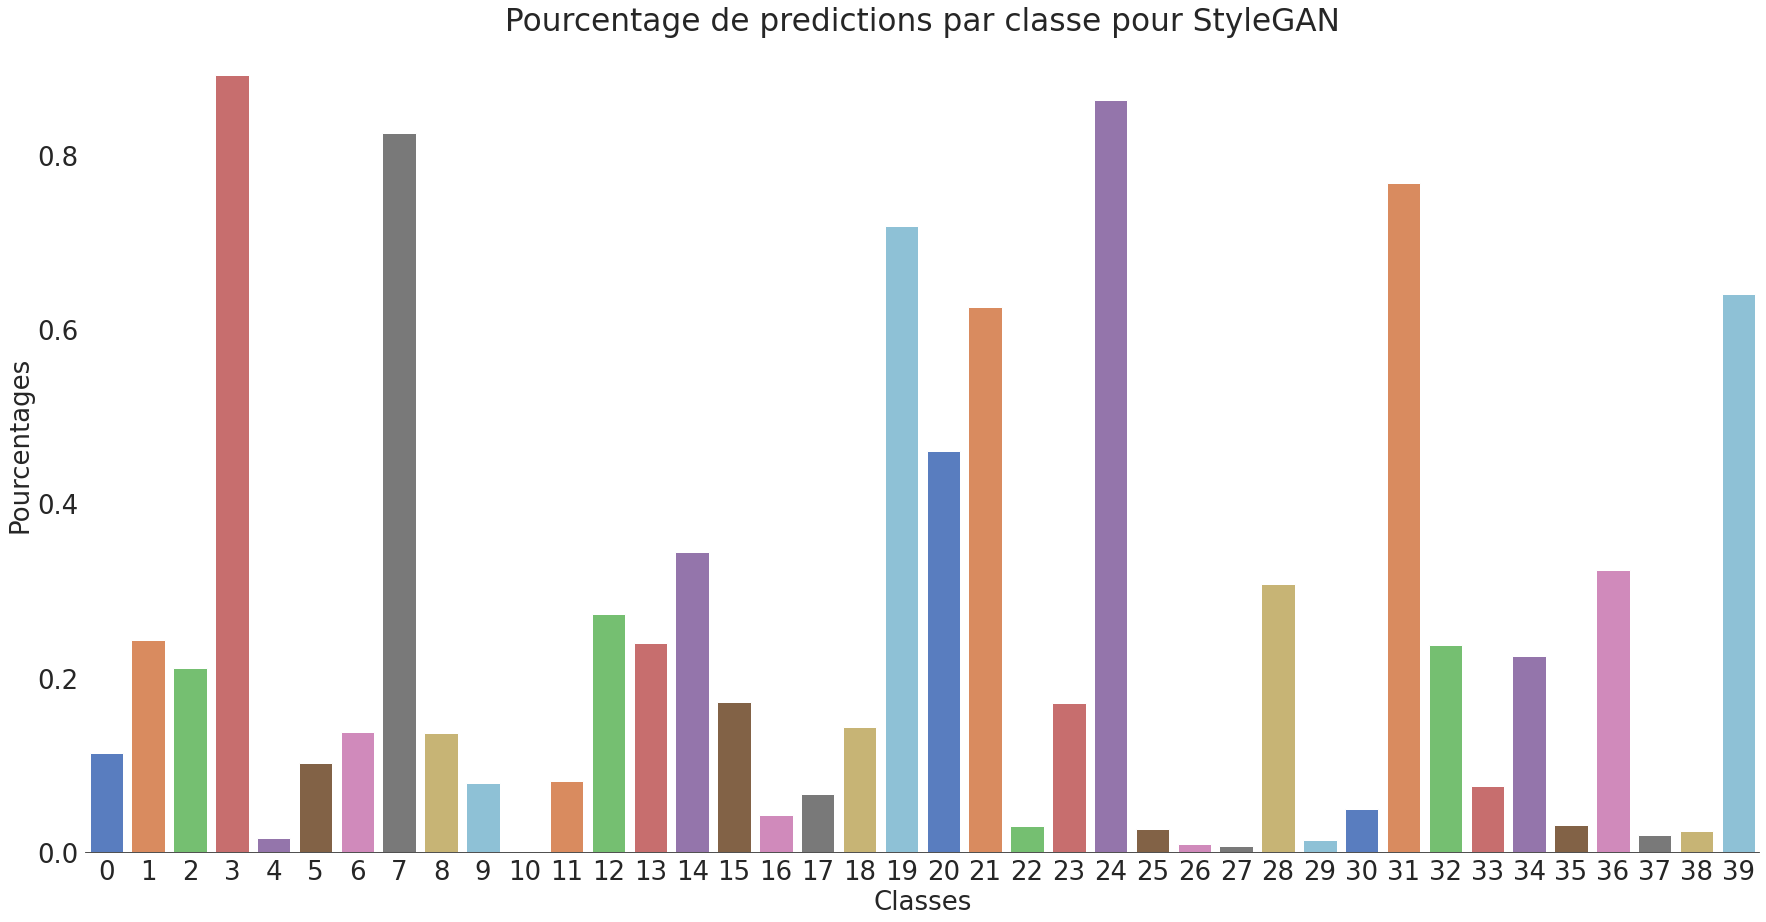

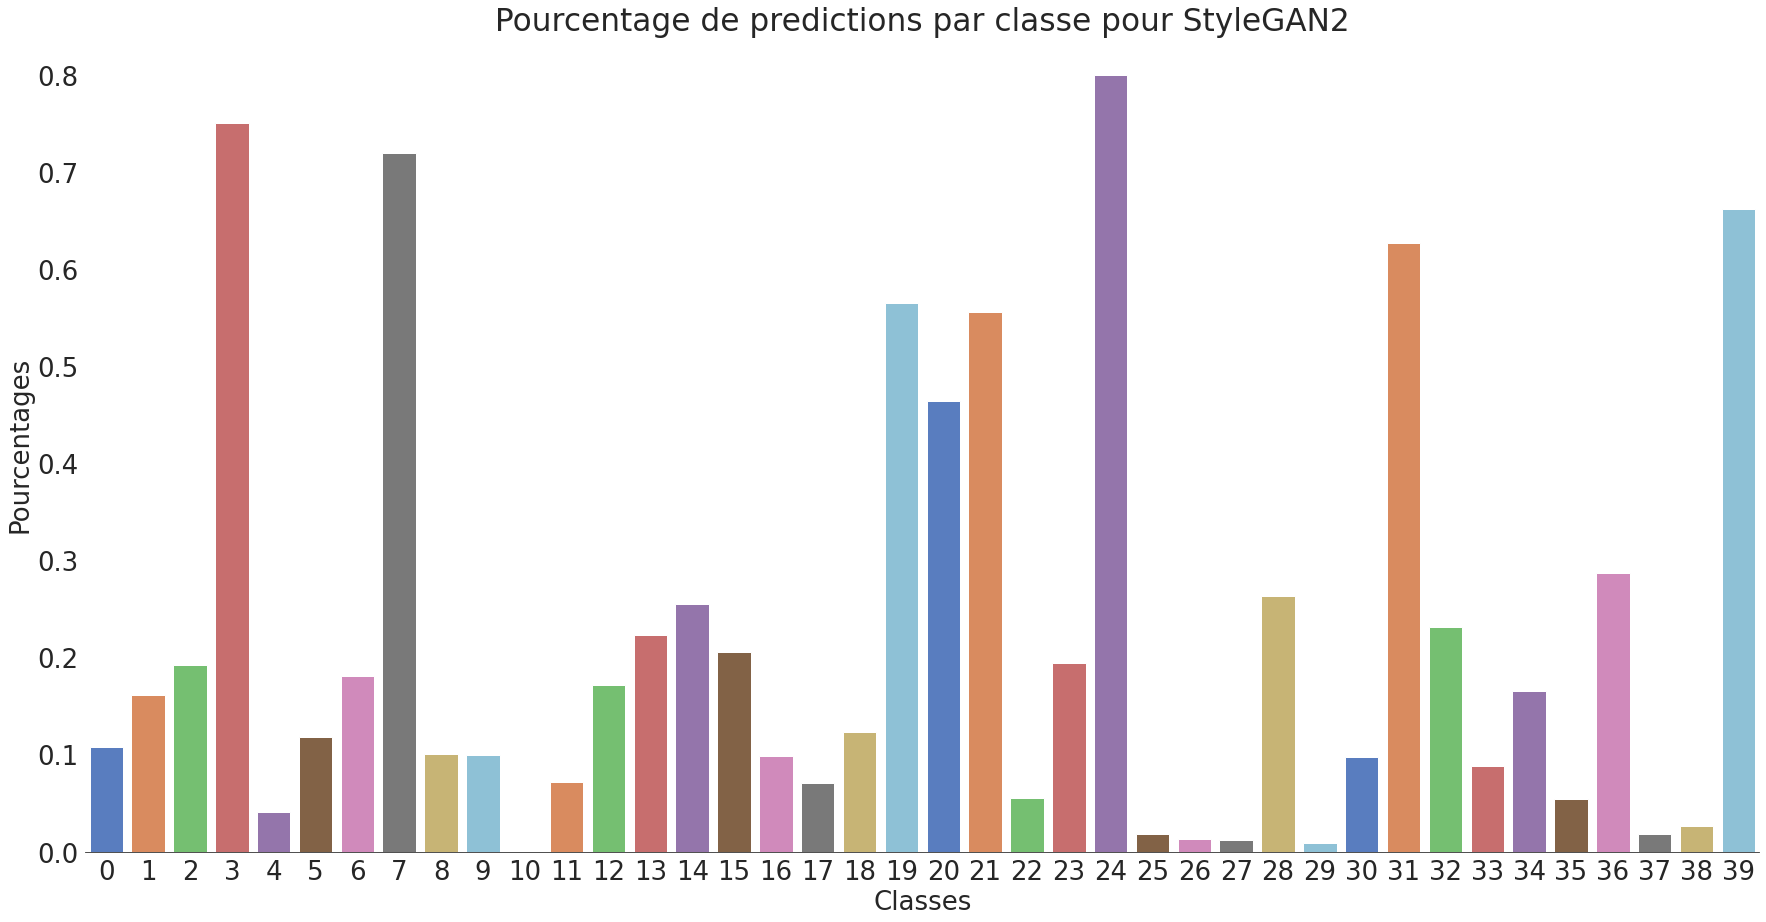

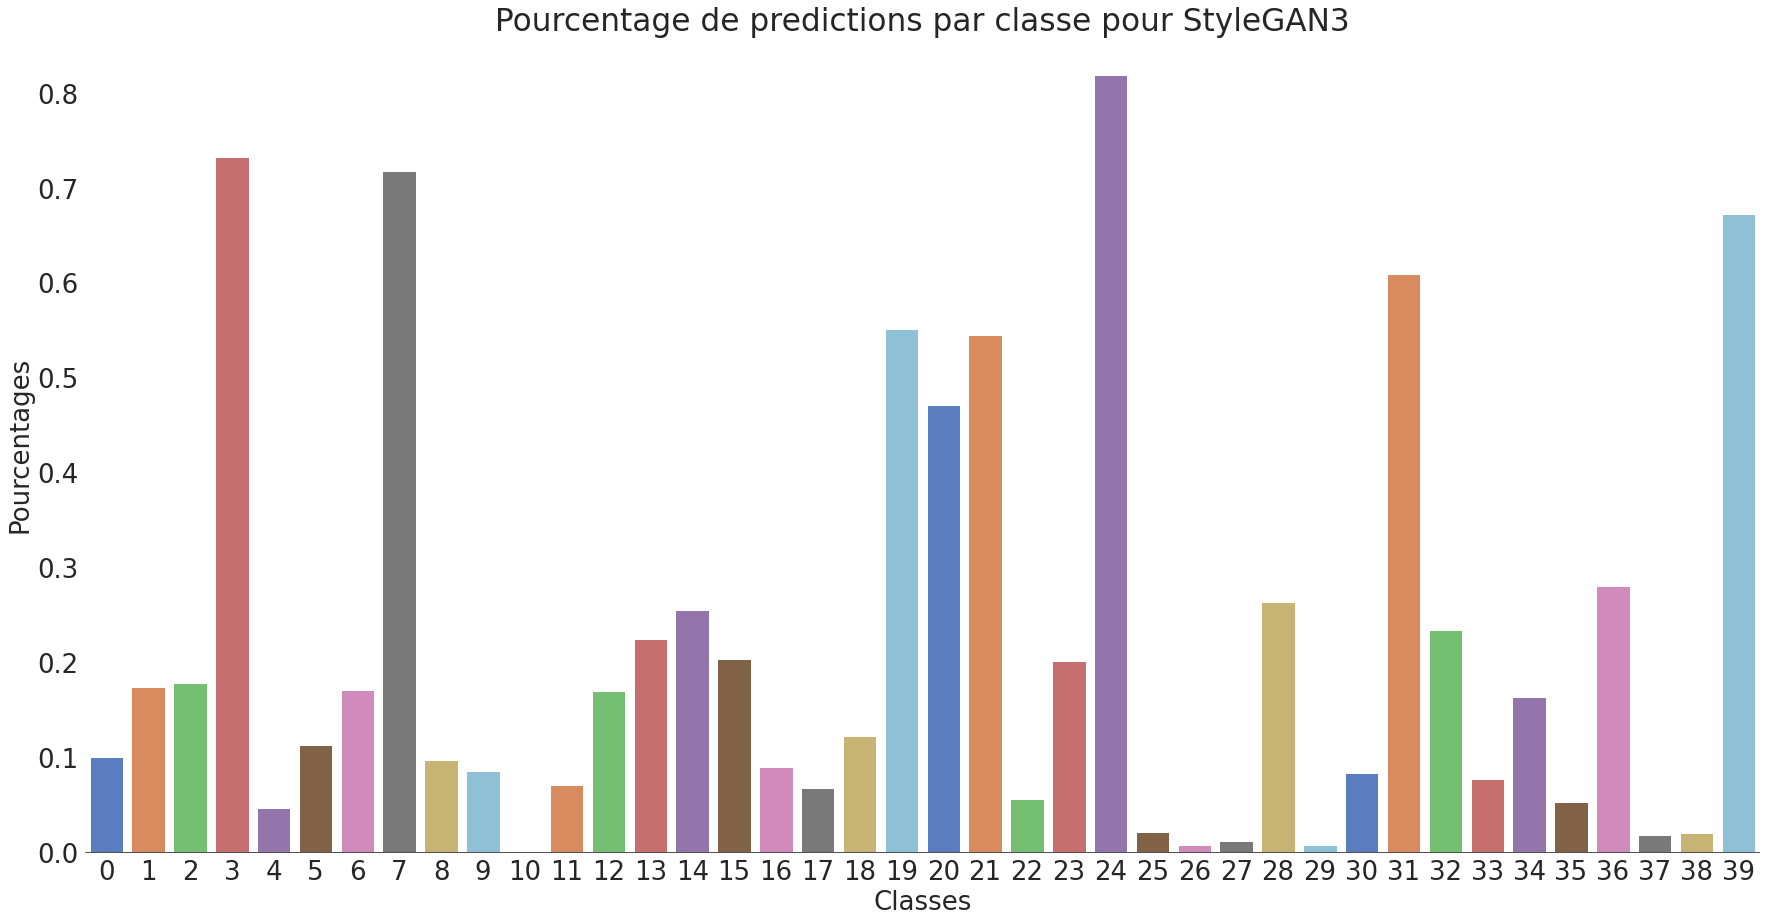

In [54]:
scores_files = ['outputs_stylegan/stylegan/scores_stylegan.json', 
                'outputs_stylegan/stylegan2/scores_stylegan2.json', 
                'outputs_stylegan/stylegan3/scores_stylegan3.json']
model_name = ['StyleGAN', 'StyleGAN2', 'StyleGAN3']

for score, model in zip(scores_files, model_name):
    plot_score_per_attr(score, model)